1. read the imaging attrs. and target density
2. prepare the data split, fracgood map, and mask
3. run ablation, regression
4. run the pipeline

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import fitsio as ft
import healpy as hp
import numpy  as np
import pandas as pd
import seaborn as sn
import sys
sys.path.append('/home/mehdi/github/LSSutils')
import  LSSutils.dataviz as dv
from LSSutils.catalogs.combinefits import hd5_2_fits

In [9]:
wmap_ngc = hp.read_map('/home/mehdi/data/formehdi/0.2/regression/nn_ablation_ngc/nn-weights.hp256.fits')
wmap_sgc = hp.read_map('/home/mehdi/data/formehdi/0.2/regression/nn_ablation_sgc/nn-weights.hp256.fits')

wmap_t = wmap_ngc.copy()
mask = np.isfinite(wmap_sgc)
wmap_t[mask] = wmap_sgc[mask]

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/pixelfunc.py:345: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)


In [10]:
data = 

In [73]:
hpix = ut.radec2hpix(256, data['RA'], data['DEC'])

In [74]:
np.isnan(wmap_t[hpix]).sum()

0

In [63]:
mask = np.isnan(wmap_t[hpix])

In [65]:
hpix[mask]

array([381567, 380542, 374394, ..., 409214, 408191, 395903])

In [66]:
wmap_t[hpix[mask]] = 1.0

In [41]:
1393/ data.size

0.015283842794759825

In [45]:
from LSSutils.dataviz import mollview

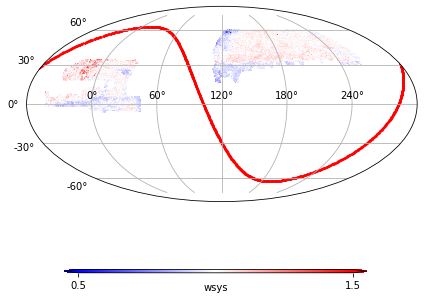

In [68]:
mollview(wmap_t, vmin=0.5, vmax=1.5, unit='wsys', colorbar=True)

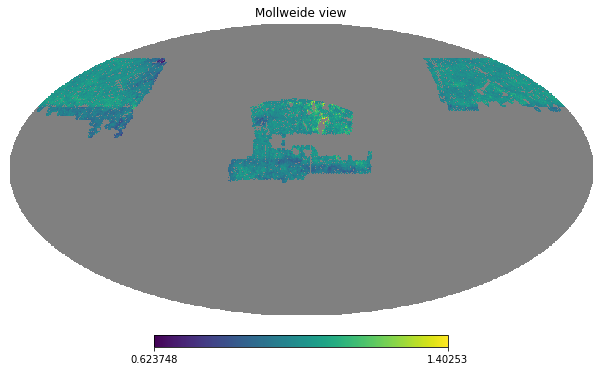

In [71]:
hp.mollview(wmap_t)

In [72]:
hp.write_map('/home/mehdi/data/formehdi/0.2/regression/nn-weights_wablation_ngc_sgc_filled_v0.2.hp256.fits', wmap_t, 
            fits_IDL=False, dtype=np.float64)

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [2]:
from LSSutils.utils import SYSWEIGHT

camb is not installed!


/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/pixelfunc.py:345: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)


Text(0, 0.5, 'DEC [deg]')

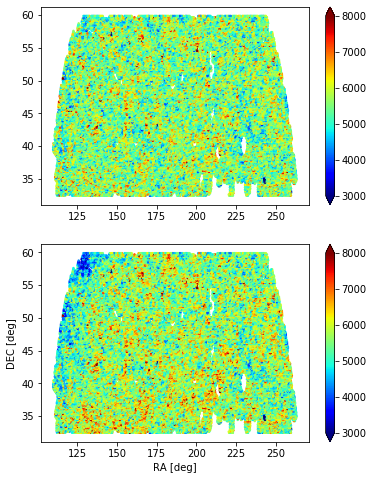

In [1]:
import sys
sys.path.append('/home/mehdi/github/LSSutils') # on my computer
from LSSutils.utils import SYSWEIGHT

%matplotlib inline
import matplotlib.pyplot as plt
import fitsio as ft


data   = ft.read('/home/mehdi/data/formehdi/pixweight_ar-dr8-0.32.0-elgsv-eBOSS.fits')
Mapper = SYSWEIGHT('/home/mehdi/data/formehdi/0.2/regression/nn-weights_wablation_ngc_sgc_filled_v0.2.hp256.fits')

north = data[data['ISNORTH']]
wsys  = Mapper(north['RA'], north['DEC'])

plt.figure(figsize=(6, 8))
plt.subplot(211)
plt.scatter(north['RA'], north['DEC'], 2,
            c=north['SV']*wsys, cmap=plt.cm.jet, vmax=8000, vmin=3000)
plt.colorbar(extend='both')

plt.subplot(212)
plt.scatter(north['RA'], north['DEC'], 2,
            c=north['SV'], cmap=plt.cm.jet, vmax=8000, vmin=3000)
plt.colorbar(extend='both')
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')

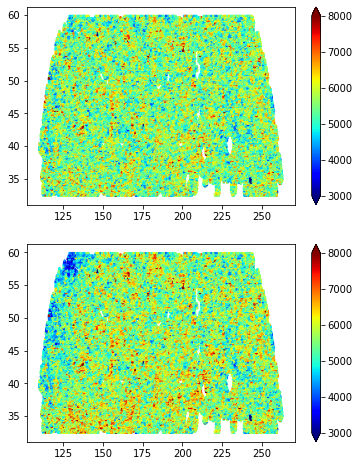

In [ ]:
wmap_t[] = 1.0

In [7]:
mapper = ut.SYSWEIGHT(wmap_t)

NameError: name 'wmap_t' is not defined

In [30]:
ws = mapper(data['RA'], data['DEC'])

# NaNs (before) : 1393
# NaNs (after)  : 903


RuntimeError: Uncovered sample

In [2]:
from LSSutils.catalogs.datarelease import cols_dr8

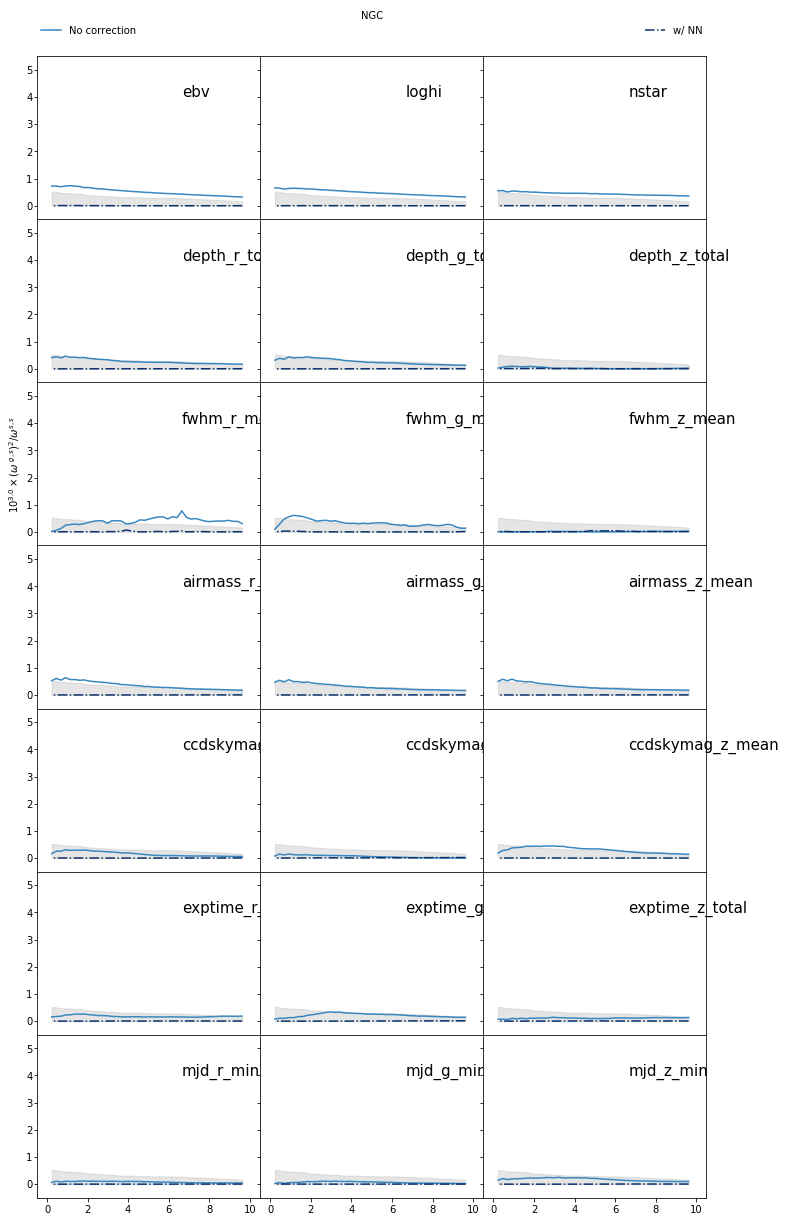

In [4]:
config = {
'crossxi':{
     'files_names':['/home/mehdi/data/formehdi/0.2/clustering/xi_ngc_uni.npy',
                    '/home/mehdi/data/formehdi/0.2/clustering/xi_ngc_nn_ablation_ngc.npy'],
     'xisys':'/home/mehdi/data/formehdi/0.2/clustering/xi_ngc_sys.npy',
     'title':'NGC',
     'labels':['No correction', 'w/ NN'],
     'saveto':None,
     'colors':None,
     'xticks':cols_dr8}          
 }

dv.plot_cross_xi(config)

prepare the data

In [2]:
dr8_elg = ft.read('/home/mehdi/data/formehdi/pixweight_ar-dr8-0.32.0-elgsv.fits')
nside   = 256 
npix    = 12*nside*nside

ss     = ['GALDEPTH_R',
          'GALDEPTH_G',
          'GALDEPTH_Z',
          'PSFSIZE_R',
          'PSFSIZE_G',
          'PSFSIZE_Z',
          'EBV',
          'STARDENS']

sysmaps = {}

sysmaps['HPIX'] = np.arange(npix)#.astype('i8')
for ss_i in ss:
    sysmaps[ss_i] = hp.reorder(dr8_elg[ss_i], n2r=True)


sysmaps['nran']  = hp.reorder(dr8_elg['FRACAREA'], n2r=True)
sysmaps['ngal']  = hp.reorder(dr8_elg['SV'], n2r=True) * sysmaps['nran'] * hp.nside2pixarea(256, degrees=True)


dataframe = pd.DataFrame(sysmaps)
dataframe.replace([np.inf, -np.inf], value=np.nan, inplace=True) # replace inf

In [3]:
dataframe.to_hdf('/home/mehdi/data/formehdi/dr8_elgsv.h5', 'data', overwrite=True)

In [2]:
dataframe = pd.read_hdf('/home/mehdi/data/formehdi/dr8_elgsv.h5')

In [3]:
dataframe.columns

Index(['HPIX', 'GALDEPTH_R', 'GALDEPTH_G', 'GALDEPTH_Z', 'PSFSIZE_R',
       'PSFSIZE_G', 'PSFSIZE_Z', 'EBV', 'STARDENS', 'nran', 'ngal'],
      dtype='object')

In [4]:
dataframe['ngal/nran'] = dataframe.ngal / dataframe.nran

In [5]:
mysample = dataframe[dataframe['nran']>0]
mysample.dropna(inplace=True)
mysample.shape

/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(378069, 12)

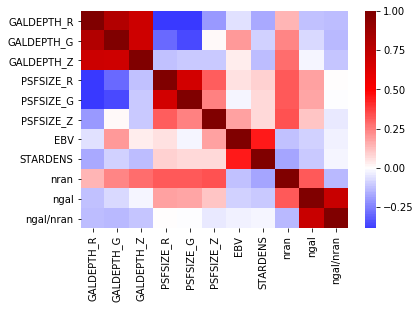

In [6]:
sn.heatmap(mysample[[s for s in mysample.columns if s!='HPIX']].corr(), 
           cmap=plt.cm.seismic, center=0.0)

In [7]:
from scipy.stats import pearsonr

def PCC(xc, yc):    
    pcc = []
    for j in range(xc.shape[1]):
        pcc.append(pearsonr(xc[:,j], yc)[0])
    return pcc

def BTPCC(xc, yc, num=100):
    np.random.seed(123456)
    pcc = []
    for _ in range(num):
        pcc.append(PCC(xc, np.random.permutation(yc)))
    return pcc

In [17]:
from LSSutils import utils

In [19]:
mysample.index

Int64Index([  1558,   1559,   1560,   1561,   1562,   1563,   1564,   1565,
              1572,   1573,
            ...
            752812, 752821, 752823, 752832, 752834, 752835, 752843, 752846,
            752856, 752890],
           dtype='int64', length=378069)

In [22]:
y0 = utils.makedelta(mysample['ngal'].values, mysample['nran'].values, np.ones(mysample['ngal'].size, '?'))
y1 = utils.makedelta(mysample['ngal'].values, mysample['nran'].values, np.ones(mysample['ngal'].size, '?'), 
                     select_fun=wmap[mysample.index])

In [23]:
x = mysample[['GALDEPTH_R', 'GALDEPTH_G', 'GALDEPTH_Z', 'PSFSIZE_R',
       'PSFSIZE_G', 'PSFSIZE_Z', 'EBV', 'STARDENS']].values

In [16]:
wmap = hp.read_map('/home/mehdi/data/formehdi/0.0/regression/nn_ablation/nn-weights.hp256.fits')

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/pixelfunc.py:345: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)


Text(0, 0.5, 'PCC (ngal/nran , systematics)')

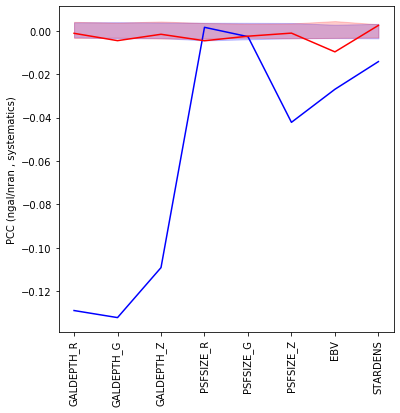

In [37]:
c = ['b', 'r']
i =0
fig, ax = plt.subplots(figsize=(6, 6))
for y_i in [y0, y1]:    
    pcc  = PCC(x,   y_i)
    pccb = BTPCC(x, y_i)
    prcnt = np.percentile(pccb, [1, 99], axis=0)
    ax.plot(pcc, color=c[i])
    ax.fill_between(np.arange(len(pccb[0])), 
                     y1=prcnt[0], y2=prcnt[1], alpha=0.2,
                    color=c[i])
    i += 1
    
ax.set_xticks(np.arange(8))
ax.set_xticklabels(['GALDEPTH_R', 'GALDEPTH_G', 'GALDEPTH_Z', 'PSFSIZE_R',
                   'PSFSIZE_G', 'PSFSIZE_Z', 'EBV', 'STARDENS'], rotation=90)
ax.set_ylabel('PCC (ngal/nran , systematics)')

/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/pixelfunc.py:345: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/projaxes.py:1196: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use 

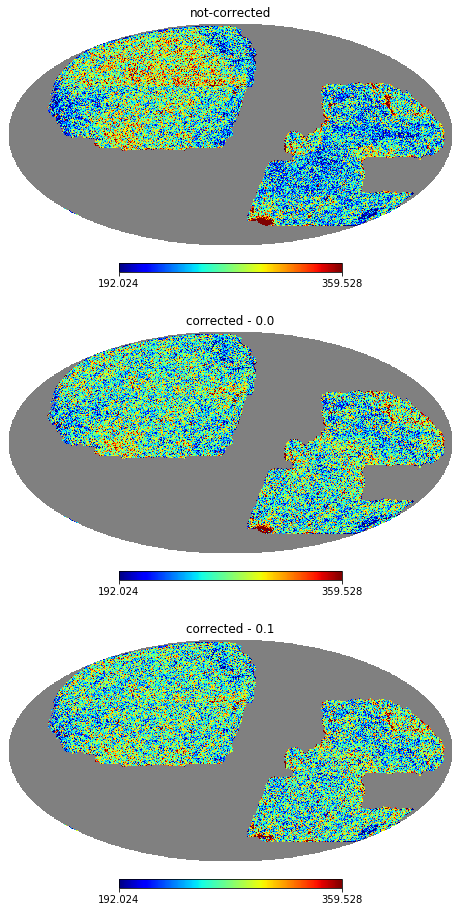

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import healpy as hp
import numpy  as np


kw    = {'verbose':False} 
nside = 256

# read maps


ngal = hp.read_map('/home/mehdi/data/formehdi/dr8_elgsv_ngal.hp.256.fits', **kw)
nran = hp.read_map('/home/mehdi/data/formehdi/dr8_elgsv_frac.hp.256.fits', **kw)

mask  = nran > 0
vmin, vmax  = np.percentile((ngal/nran)[mask], [2.5, 97.5])
kw = dict(hold=True, min=vmin, max=vmax, cmap=plt.cm.jet, rot=120)
    
fig, ax  = plt.subplots(nrows=3, figsize=(8,17))
ax = ax.flatten()
fig.subplots_adjust(hspace=0, wspace=0)

i  = 0
plt.sca(ax[i])
hp.mollview(ngal/nran,  title='not-corrected', **kw)
i += 1

for version in ['0.0', '0.1']:   
    ngalc = ngal.copy()
    wmap = hp.read_map('/home/mehdi/data/formehdi/'\
                       +version+'/regression/nn_plain/nn-weights.hp256.fits', verbose=False)
    ngalc[mask] = ngalc[mask]/wmap[mask]
    plt.sca(ax[i])
    hp.mollview(ngalc/nran, title='corrected - '+version,     **kw)
    i += 1
plt.show()

In [7]:
hd5_2_fits(mysample, ss,  fitname='/home/mehdi/data/formehdi/dr8_elgsv.fits',
                          hpmask='/home/mehdi/data/formehdi/dr8_elgsv_mask.hp.256.fits',
                          hpfrac='/home/mehdi/data/formehdi/dr8_elgsv_frac.hp.256.fits',
                          fitnamekfold='/home/mehdi/data/formehdi/dr8_elgsv_5r.npy',
                          res=256,
                          k=5)

wrote /home/mehdi/data/formehdi/dr8_elgsv.fits
wrote /home/mehdi/data/formehdi/dr8_elgsv_mask.hp.256.fits
wrote /home/mehdi/data/formehdi/dr8_elgsv_frac.hp.256.fits
wrote /home/mehdi/data/formehdi/dr8_elgsv_5r.npy


/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/pixelfunc.py:345: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/projaxes.py:1196: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/projaxes.py:1155: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/projaxes.py:1176: RuntimeWarning: invalid value encountered in less
  result.data[result.data < 0] = 0.0
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/projaxes.py:11

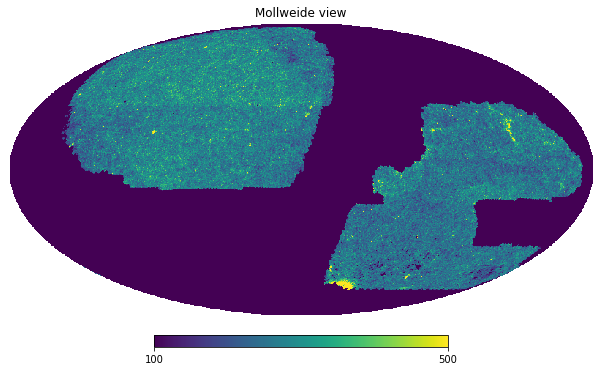

In [8]:
hp.mollview(dataframe['ngal'], min=100, max=500, rot=+120)

In [9]:
hp.write_map('/home/mehdi/data/formehdi/dr8_elgsv_ngal.hp.256.fits', dataframe.ngal, 
             fits_IDL=False, dtype=np.float64)

Exploration

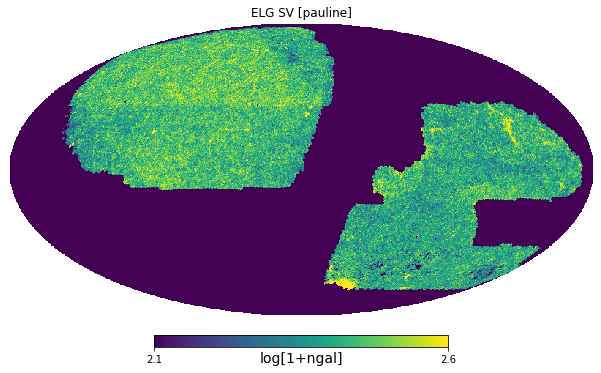

In [40]:
hp.mollview(np.log10(1+dataframe['ngal']),
            min=2.1, max=2.6,
            rot=120, title='ELG SV [pauline]',
           unit='log[1+ngal]')

In [2]:
from LSSutils import dataviz
from glob import glob

In [28]:
help(dataviz.plot_nnbar)

Help on function plot_nnbar in module LSSutils.dataviz:

plot_nnbar(nnbars, title=None, axes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], figax=None, annot=False, lb=None, cl=None, err=False, hold=False, lgannot=False)
    All:
        dataviz.plot_nnbar(['/home/mehdi/data/eboss/v6/results_ngc.all/clustering/nnbar_NGC_v6_z0.8.npy',
                               '/home/mehdi/data/eboss/v6/results_ngc.all/clustering/nnbar_NGC_v6_z1.1.npy',
                               '/home/mehdi/data/eboss/v6/results_ngc.all/clustering/nnbar_NGC_v6_z1.3.npy',
                               '/home/mehdi/data/eboss/v6/results_ngc.all/clustering/nnbar_NGC_v6_z1.5.npy',
                               '/home/mehdi/data/eboss/v6/results_ngc.all/clustering/nnbar_NGC_v6_z1.7.npy',
                               '/home/mehdi/data/eboss/v6/results_ngc.all/clustering/nnbar_NGC_v6_z1.9.npy'
                              ],
                       title='w/ systot',
                    lb=['0.8<z<1

In [26]:
ls /home/mehdi/data/formehdi/0.1/clustering/nnbar_*.npy

/home/mehdi/data/formehdi/0.1/clustering/nnbar_all_nn_ablation.npy
/home/mehdi/data/formehdi/0.1/clustering/nnbar_all_nn_plain.npy
/home/mehdi/data/formehdi/0.1/clustering/nnbar_all_uni.npy
/home/mehdi/data/formehdi/0.1/clustering/nnbar_ngc_nn_ablation.npy
/home/mehdi/data/formehdi/0.1/clustering/nnbar_ngc_nn_plain.npy
/home/mehdi/data/formehdi/0.1/clustering/nnbar_ngc_uni.npy
/home/mehdi/data/formehdi/0.1/clustering/nnbar_sgc_nn_ablation.npy
/home/mehdi/data/formehdi/0.1/clustering/nnbar_sgc_nn_plain.npy
/home/mehdi/data/formehdi/0.1/clustering/nnbar_sgc_uni.npy


In [3]:
from LSSutils.catalogs.datarelease import cols_dr8 as ss
ss

['ebv',
 'loghi',
 'nstar',
 'depth_r_total',
 'depth_g_total',
 'depth_z_total',
 'fwhm_r_mean',
 'fwhm_g_mean',
 'fwhm_z_mean',
 'airmass_r_mean',
 'airmass_g_mean',
 'airmass_z_mean',
 'ccdskymag_r_mean',
 'ccdskymag_g_mean',
 'ccdskymag_z_mean',
 'exptime_r_total',
 'exptime_g_total',
 'exptime_z_total',
 'mjd_r_min',
 'mjd_g_min',
 'mjd_z_min']

In [4]:
len(ss)

21

1444.0  21  68.8
33.0  21  1.6
52.7  21  2.5


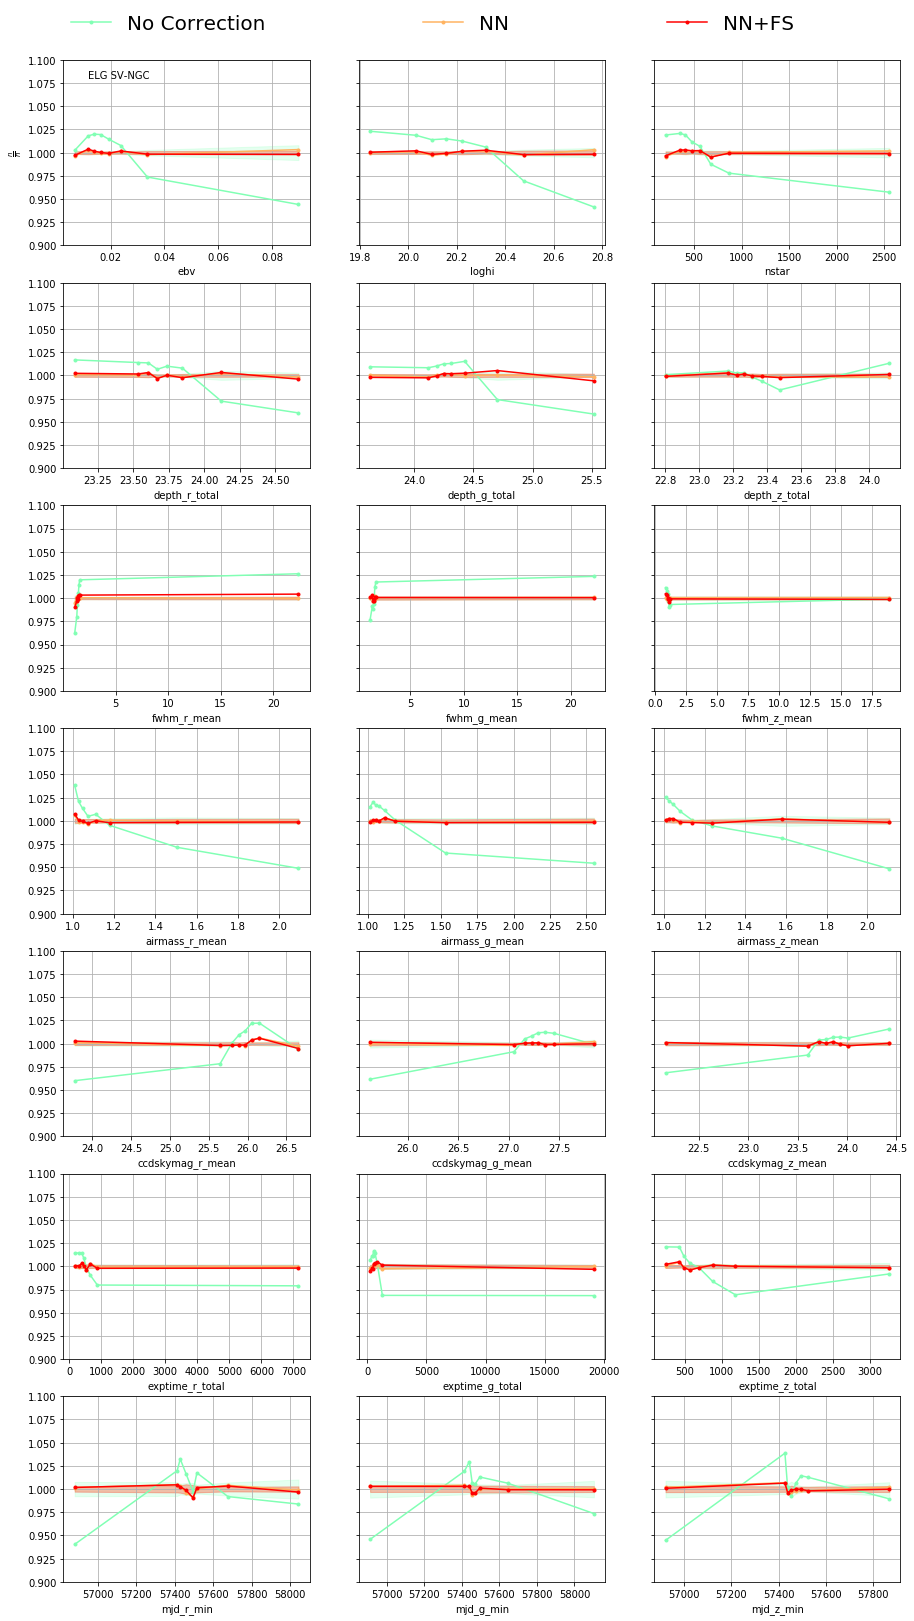

1224.3  21  58.3
31.9  21  1.5
42.3  21  2.0


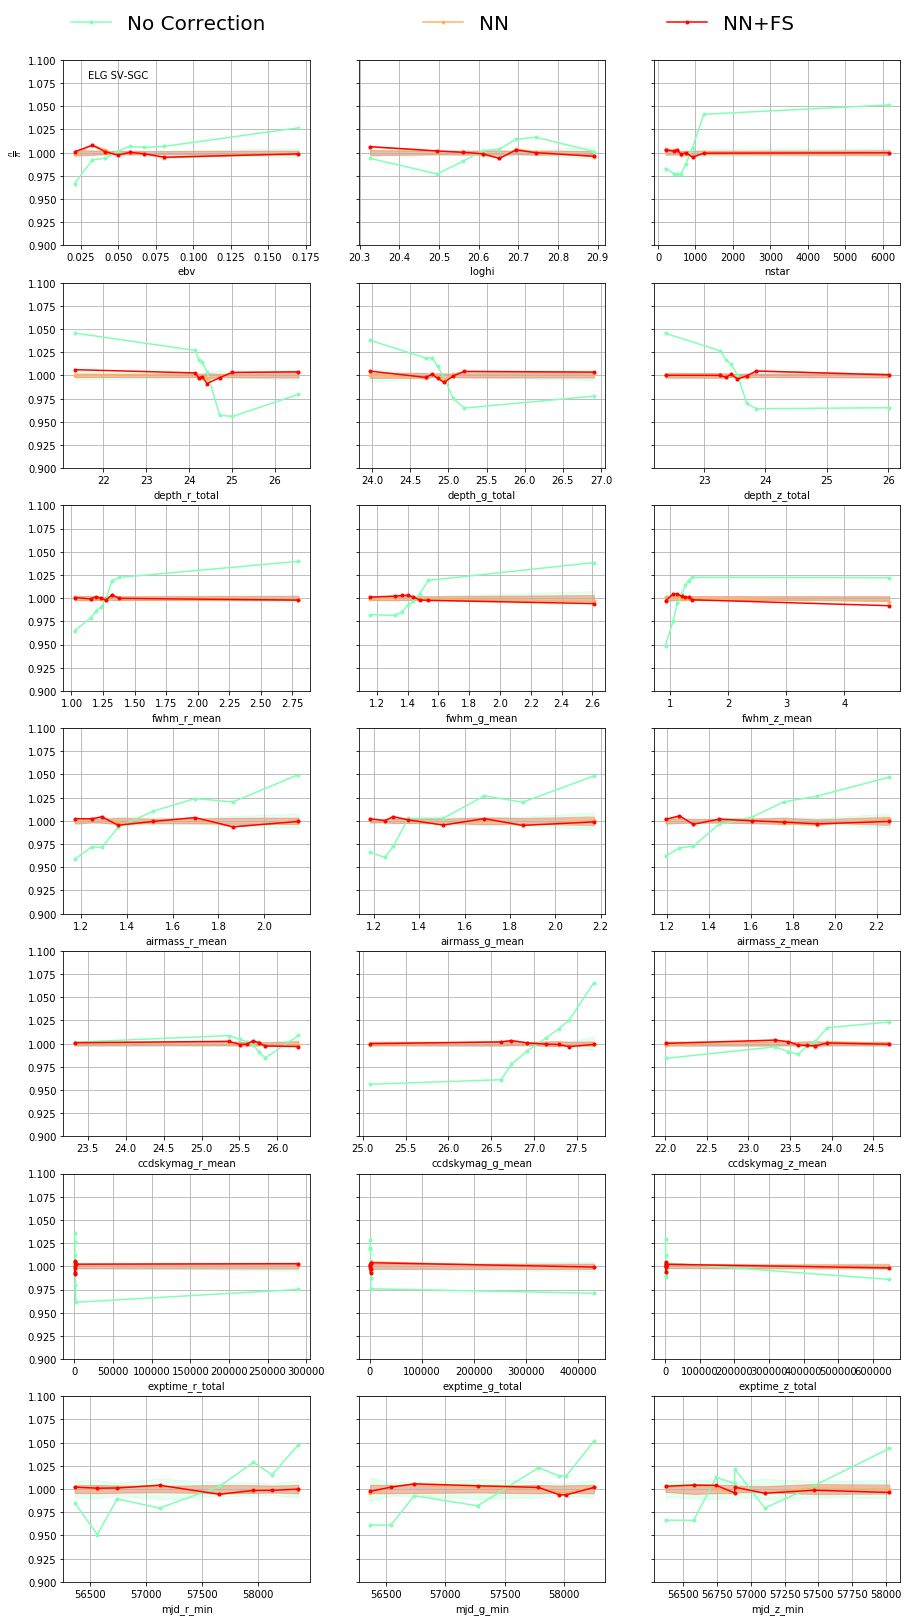

In [7]:
for cap in ['ngc', 'sgc']:
    
    fig, ax = plt.subplots(ncols=3, nrows=7, figsize=(15, 28),
                          sharey=True)
    ax=ax.flatten()
    dataviz.plot_nnbar(['/home/mehdi/data/formehdi/0.2/clustering/nnbar_'+cap+'_uni.npy',
                        '/home/mehdi/data/formehdi/0.2/clustering/nnbar_'+cap+'_nn_plain_'+cap+'.npy',
                        '/home/mehdi/data/formehdi/0.2/clustering/nnbar_'+cap+'_nn_ablation_'+cap+'.npy'
                       ],
                       title='ELG SV-'+cap.upper(),
                       lb=['No Correction', 
                           'NN',
                           'NN+FS'],
                      axes=[i for i in range(21)],
                      cl=plt.cm.rainbow,
                      figax=(fig, ax),
                      hold=True)

    #ax[6].set(xlim=(0., 0.1))
    #ax[7].set(xlim=(0, 2000))
    #ax[6].set(xscale='log')
    #ax[7].set(xscale='log')
    
    for i in range(21):ax[i].set(xlabel=ss[i])
    plt.show()

3374.0  21  160.7
200.6  21  9.6
172.5  21  8.2


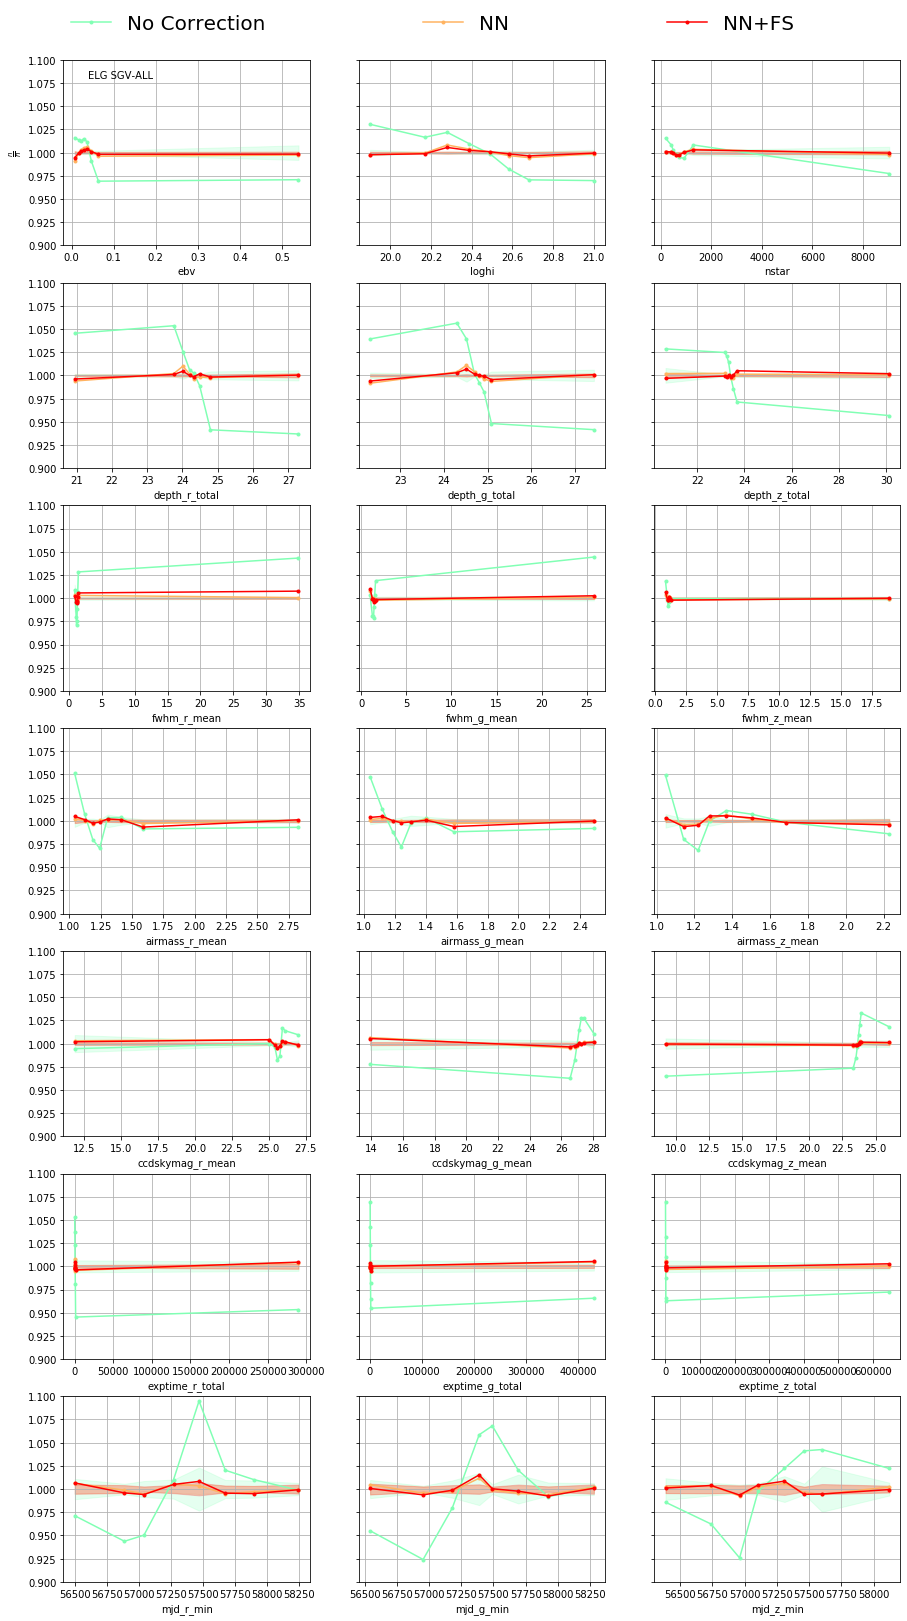

4935.5  21  235.0
380.5  21  18.1
365.5  21  17.4


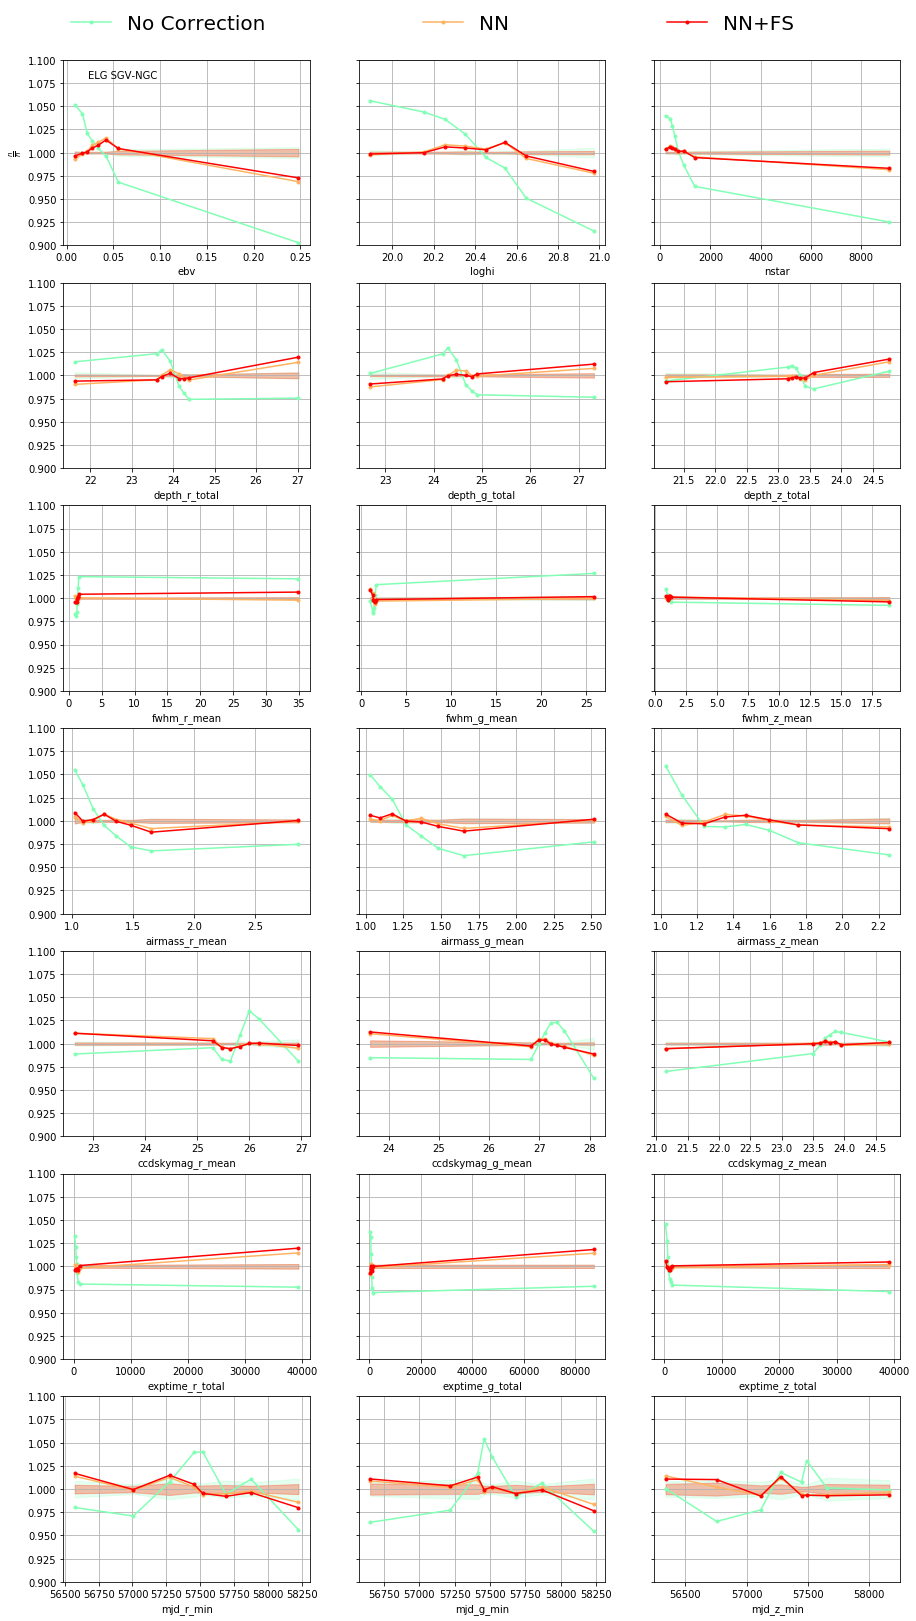

2958.1  21  140.9
298.7  21  14.2
341.7  21  16.3


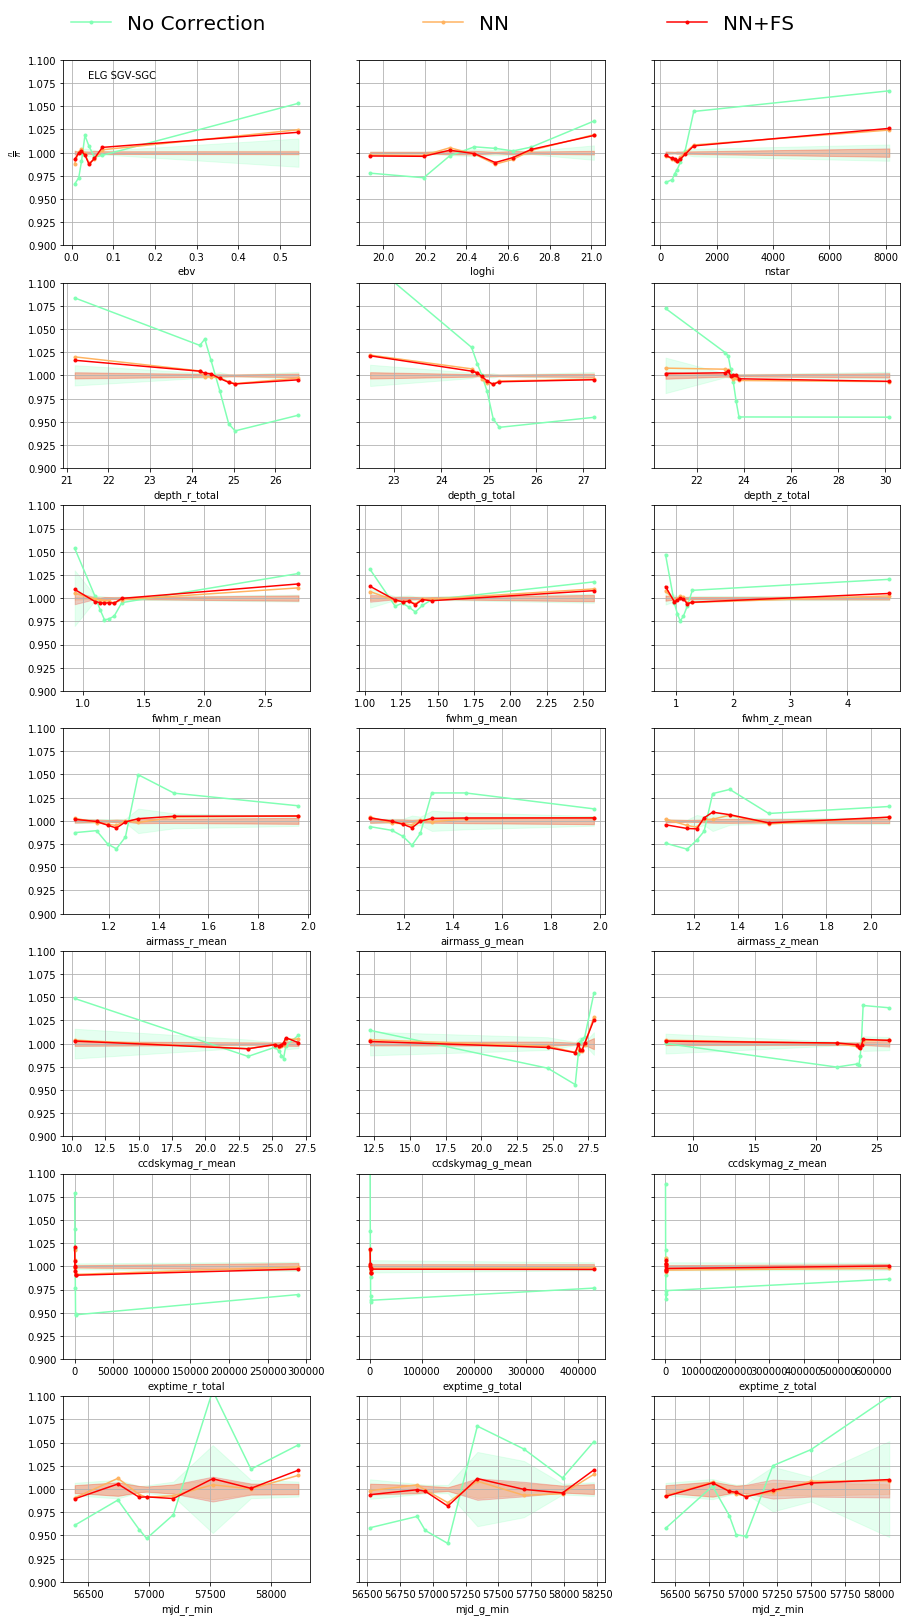

In [34]:
for cap in ['all', 'ngc', 'sgc']:
    
    fig, ax = plt.subplots(ncols=3, nrows=7, figsize=(15, 28),
                          sharey=True)
    ax=ax.flatten()
    dataviz.plot_nnbar(['/home/mehdi/data/formehdi/0.1/clustering/nnbar_'+cap+'_uni.npy',
                        '/home/mehdi/data/formehdi/0.1/clustering/nnbar_'+cap+'_nn_plain.npy',
                        '/home/mehdi/data/formehdi/0.1/clustering/nnbar_'+cap+'_nn_ablation.npy'
                       ],
                       title='ELG SGV-'+cap.upper(),
                       lb=['No Correction', 
                           'NN',
                           'NN+FS'],
                      axes=[i for i in range(21)],
                      cl=plt.cm.rainbow,
                      figax=(fig, ax),
                      hold=True)

    #ax[6].set(xlim=(0., 0.1))
    #ax[7].set(xlim=(0, 2000))
    #ax[6].set(xscale='log')
    #ax[7].set(xscale='log')
    
    for i in range(21):ax[i].set(xlabel=ss[i])
    plt.show()

In [13]:
ss     = ['GALDEPTH_R',
          'GALDEPTH_G',
          'GALDEPTH_Z',
          'PSFSIZE_R',
          'PSFSIZE_G',
          'PSFSIZE_Z',
          'EBV',
          'STARDENS']

2325.5  8  290.7
70.1  8  8.8
107.6  8  13.5


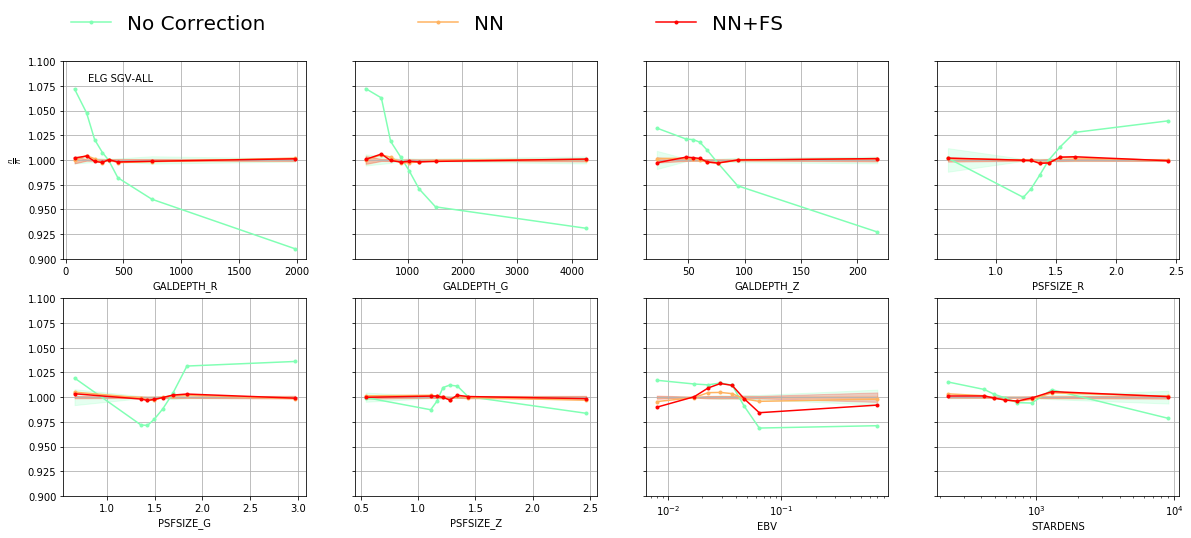

2459.9  8  307.5
108.7  8  13.6
185.8  8  23.2


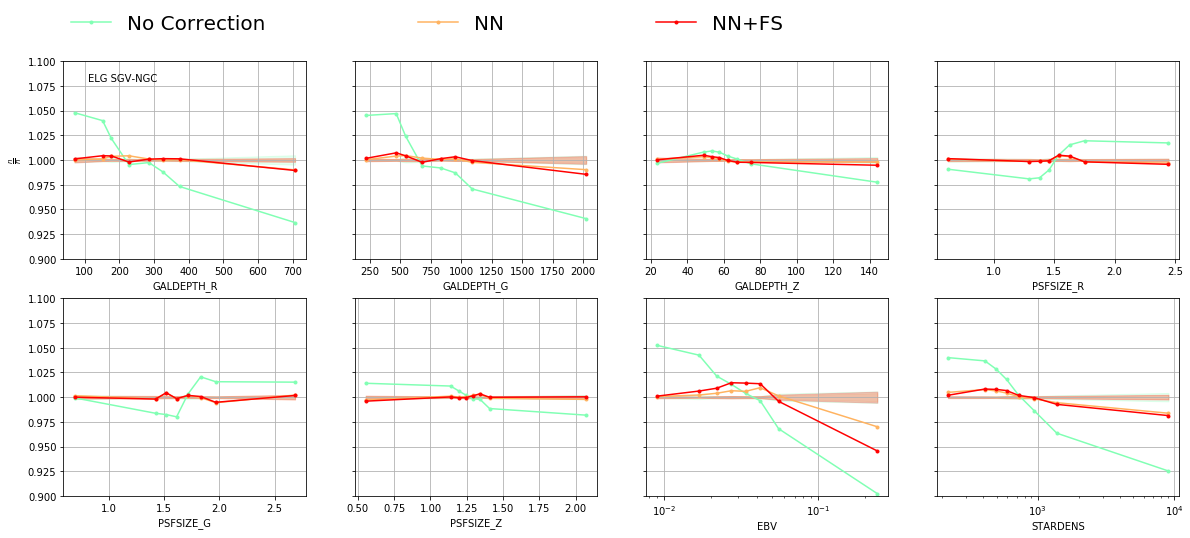

1588.0  8  198.5
118.9  8  14.9
149.0  8  18.6


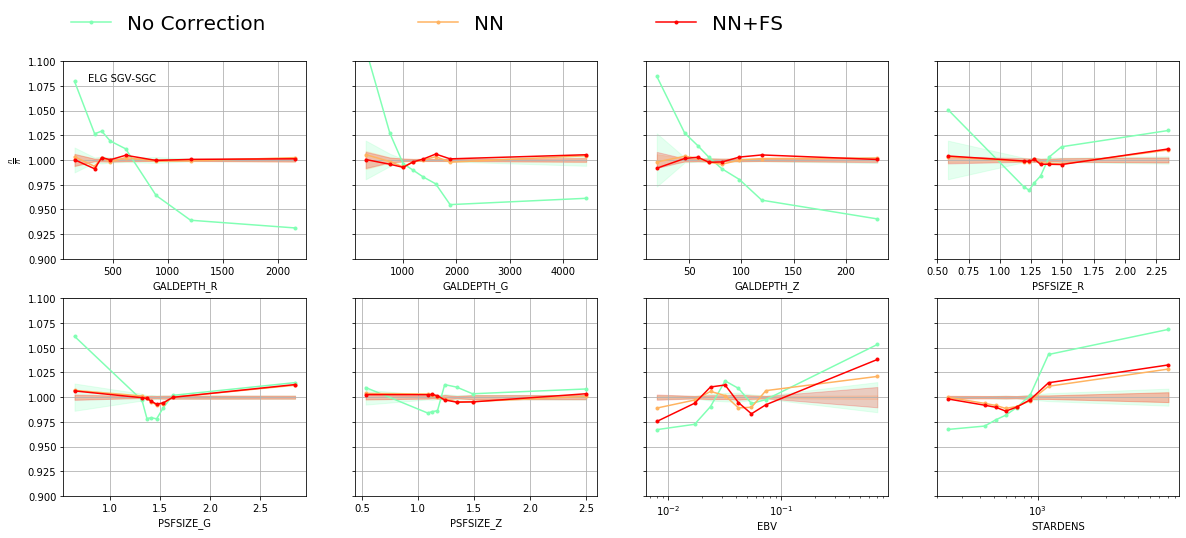

In [34]:
for cap in ['all', 'ngc', 'sgc']:
    
    fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(20, 8),
                          sharey=True)
    ax=ax.flatten()
    dataviz.plot_nnbar(['/home/mehdi/data/formehdi/clustering/nnbar_'+cap+'_uni.npy',
                        '/home/mehdi/data/formehdi/clustering/nnbar_'+cap+'_nn_plain.npy',
                        '/home/mehdi/data/formehdi/clustering/nnbar_'+cap+'_nn_ablation.npy'
                       ],
                       title='ELG SGV-'+cap.upper(),
                       lb=['No Correction', 
                           'NN',
                           'NN+FS'],
                      axes=[i for i in range(8)],
                      cl=plt.cm.rainbow,
                      figax=(fig, ax),
                      hold=True)

    #ax[6].set(xlim=(0., 0.1))
    #ax[7].set(xlim=(0, 2000))
    ax[6].set(xscale='log')
    ax[7].set(xscale='log')
    
    for i in range(8):ax[i].set(xlabel=ss[i])
    plt.show()



381.503795734508 -0.1294758629621917
401.59640088594404 -0.07966218430577321
359.024489633597 -0.5102932903788826
347.9400474733696 -0.21680478155094995
353.0655813536421 -0.10842659821874712


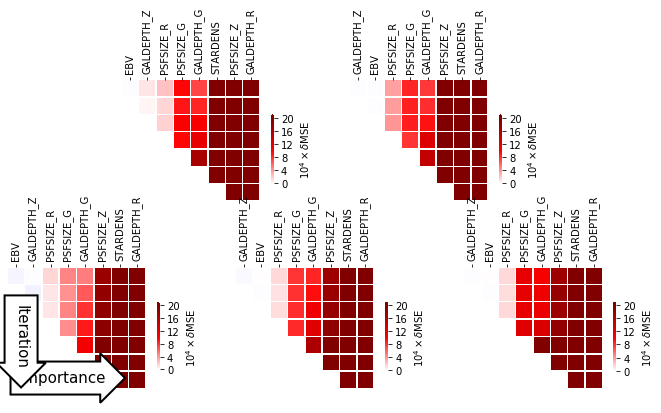

In [62]:
labels = ['GALDEPTH_R',
          'GALDEPTH_G',
          'GALDEPTH_Z',
          'PSFSIZE_R',
          'PSFSIZE_G',
          'PSFSIZE_Z',
          'EBV',
          'STARDENS']

dataviz.ablation_plot_all(glob('./ablation/d8elgsv.log_fold*.npy'), 
                         labels=labels)

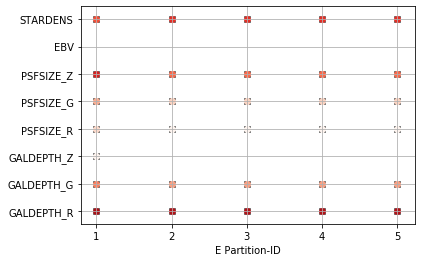

In [64]:
dataviz.get_selected_maps(glob('./ablation/d8elgsv.log_fold*.npy'),
                         labels=labels, tl='ELG SV')

In [36]:
mask = hp.read_map('/home/mehdi/data/formehdi/dr8_elgsv_mask.hp.256.fits').astype('bool')
ngal = hp.read_map('/home/mehdi/data/formehdi/dr8_elgsv_ngal.hp.256.fits')
frac = hp.read_map('/home/mehdi/data/formehdi/dr8_elgsv_frac.hp.256.fits')

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/pixelfunc.py:345: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)


/home/mehdi/data/formehdi/regression/nn_ablation/nn-weights.hp256.fits
[ 0.53850323  0.95917086  0.99818885 14.26677819]
/home/mehdi/data/formehdi/regression/nn_plain/nn-weights.hp256.fits
[ 0.32335208  0.94670991  0.99541763 16.35357562]


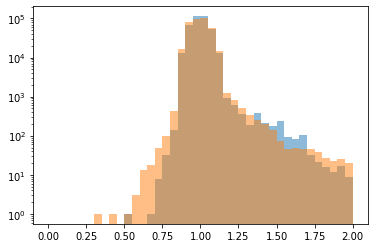

In [57]:
maps = glob('/home/mehdi/data/formehdi/regression/*/nn-weights.hp256.fits')
for map_i in maps:
    print(map_i)
    wmap = hp.read_map(map_i, verbose=False)
    print(np.percentile(wmap[mask.astype('bool')], [0, 25, 50, 100]))
    plt.hist(wmap[mask.astype('bool')], alpha=0.5, range=(0, 2), bins=40)
plt.yscale('log')

/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


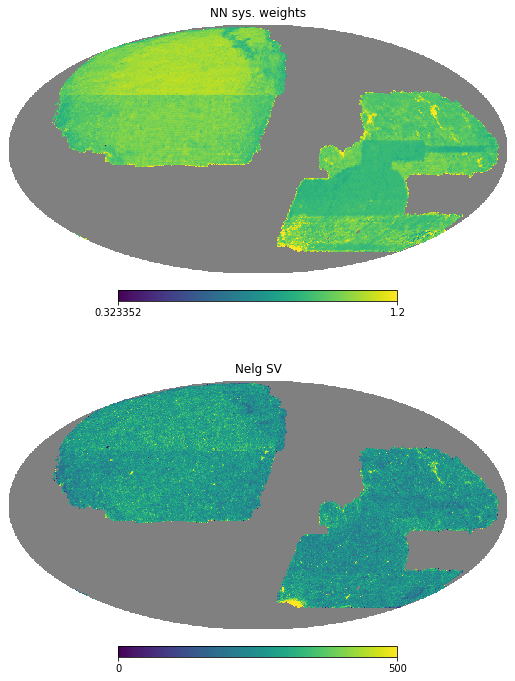

In [56]:
plt.figure(figsize=(10, 12))
plt.subplot(211)
hp.mollview(wmap, max=1.2, hold=True, rot=120, title='NN sys. weights')
plt.subplot(212)
hp.mollview(ngal/frac, max=500, hold=True, rot=120, title='Nelg SV')

In [48]:
r = hp.Rotator(coord=['C', 'G'])
theta, phi = hp.pix2ang(256, np.arange(12*256*256))
theta_g, phi_g = r(theta, phi) # C to G
ngc = theta_g < np.pi/2
sgc = ~ngc
mngc = mask & ngc
msgc = mask & sgc

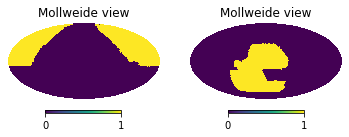

In [50]:
plt.subplot(121)
hp.mollview(mngc, hold=True)
plt.subplot(122)
hp.mollview(msgc, hold=True)

In [54]:
hp.write_map('/home/mehdi/data/formehdi/dr8_elgsv_mask_ngc.hp.256.fits', mngc, fits_IDL=False, dtype='float64')
hp.write_map('/home/mehdi/data/formehdi/dr8_elgsv_mask_sgc.hp.256.fits', msgc, fits_IDL=False, dtype='float64')

In [2]:
from LSSutils import dataviz 

In [3]:
help(dataviz.plot_cell)

Help on function plot_cell in module LSSutils.dataviz:

plot_cell(filen, clsysname, labels, bins=None, error=True, corrcoef=True, annot=True, title='Cross C$_\\ell$', saveto=None)
    Example:
    
    cap    = 'ngc'
    CAP    = cap.upper()
    filen  = lambda l:'/home/mehdi/data/eboss/v6/results_'+cap+'.all/clustering/cl_'+CAP+'_'+l+'.npy'
    clsys  = '/home/mehdi/data/eboss/v6/results_'+cap+'.all/clustering/cl_sys.npy'
    
    labels = dict(lb = ['v6_wosys', 'v6', 'v6_wosys_z0.8', 'v6_wosys_z1.1', 'v6_wosys_z1.3',
                        'v6_wosys_z1.5', 'v6_wosys_z1.7', 'v6_wosys_z1.9'],
                  lt = ['No correction', 'systot (0.8<z<2.2)', '0.8<z<1.1', 
                        '1.1<z<1.3', '1.3<z<1.5', '1.5<z<1.7', '1.7<z<1.9','1.9<z<2.2'],
                  c  = ['k', 'k', 'purple', 'royalblue', 'crimson', 'olive', 'g', 'darkorange'],
                  ls = 3*['-', '--', '-', '-.'],
                  mk = 3*['.', 'o', '^', 'x'])
    
    dataviz.plot_cell(filen, clsys,

In [4]:
ls /home/mehdi/data/formehdi/0.0/clustering/cl_*_*.npy

/home/mehdi/data/formehdi/0.0/clustering/cl_all_nn_ablation.npy
/home/mehdi/data/formehdi/0.0/clustering/cl_all_nn_plain.npy
/home/mehdi/data/formehdi/0.0/clustering/cl_all_uni.npy
/home/mehdi/data/formehdi/0.0/clustering/cl_ngc_nn_ablation.npy
/home/mehdi/data/formehdi/0.0/clustering/cl_ngc_nn_plain.npy
/home/mehdi/data/formehdi/0.0/clustering/cl_ngc_uni.npy
/home/mehdi/data/formehdi/0.0/clustering/cl_sgc_nn_ablation.npy
/home/mehdi/data/formehdi/0.0/clustering/cl_sgc_nn_plain.npy
/home/mehdi/data/formehdi/0.0/clustering/cl_sgc_uni.npy


In [ ]:
l = 
cap    = 'all'
filen  = lambda l:'/home/mehdi/data/formehdi/0.0/clustering/cl_'+CAP+'_'+l+'.npy'
clsys  = '/home/mehdi/data/eboss/v6/results_'+cap+'.all/clustering/cl_sys.npy'

labels = dict(lb = ['uni', 'nn_plain', 'nn_ablation'],
              lt = ['No correction', 'NN', 'NN+FS'],
              c  = ['k', 'k', 'purple', 'royalblue', 'crimson', 'olive', 'g', 'darkorange'],
              ls = 3*['-', '--', '-', '-.'],
              mk = 3*['.', 'o', '^', 'x'])

dataviz.plot_cell(filen, 
                  clsys, 
                  labels, 
                  corrcoef=False, title=CAP+'No correction')